# How to use JANNI as a library

Here I will provide a couple of examples how use the interface of JANNI to integrate it other software packages.

This tutorial is divided in two parts:

1. Train Denoising
2. Use Denoising

# 1. Train a noise2noise model with JANNI

There are two interface methods to train a denoising network with JANNI:

1. Training directly with movie files using even/odd split pairs
2. Split the movies yourself and train on the pairs.

For both options we have to import janni:

In [33]:
from janni import train, predict
from matplotlib import pyplot as plt
import mrcfile

## 1.1 Training directly with movie files using even/odd split pairs 
In this option you have to specifiy the directory where the movies are (movie_path). This movies are then splitted into pairs by building averages of even / odd frames. The even averages are saved in even_path and the odd_path.
We now define your data paths:

In [34]:
movie_path = "/home/twagner/Projects/denoise/data/TOXIN_MOVIES/" # Here are your movies
even_path = "/home/twagner/Projects/denoise/results/example/even_avg/" # In this directory we will save averages based of even frames.
odd_path = "/home/twagner/Projects/denoise/results/example/odd_avg/" # In this directory we will save averages based of odd frames.
test_averages = "/home/twagner/Projects/denoise/data/TOXIN_AVERAGES/" # Here are some motion corrected averages to denoise

A couple of more parameters are needed to run the training:

In [35]:
learning_rate = 0.001 # Learning rate for training. Typically you don't have to change it.
epochs = 100 # Number of epochs to train the network
model = "unet" # Model indentifier. Right now only "unet" is supported.
patch_size= (1024,1024) # Patch size in pixel. The network is trained on random patches of the images.
batch_size = 4 # Mini-batch size used during training.

We can now start the training. Using the movies in your movies dir JANNI will create even / odd averages. To start the training do: 

In [36]:
trained_model = train.train_movie_dir(
    movie_path = movie_path,
    even_path = even_path,
    odd_path = odd_path,
    learning_rate = learning_rate,
    epochs = epochs,
    model = model,
    patch_size = patch_size,
    batch_size = batch_size
)

Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0200_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0199_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0198_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0197_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0196_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0195_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0194_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0193_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0192_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN

Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0138_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0139_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0140_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0141_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0142_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0143_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0144_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0145_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN_MOVIES/TcdA1-0146_frames.mrc
Create even/odd micrograph for: /home/twagner/Projects/denoise/data/TOXIN

26/26 [==============================] - 22s 846ms/step - loss: 0.9145 - val_loss: 0.9069
Epoch 49/100
26/26 [==============================] - 22s 848ms/step - loss: 0.9168 - val_loss: 0.9145
Epoch 50/100
26/26 [==============================] - 22s 845ms/step - loss: 0.9159 - val_loss: 0.9138
Epoch 51/100
26/26 [==============================] - 22s 848ms/step - loss: 0.9163 - val_loss: 0.9104
Epoch 52/100
26/26 [==============================] - 22s 847ms/step - loss: 0.9155 - val_loss: 0.8931
Epoch 53/100
26/26 [==============================] - 22s 846ms/step - loss: 0.9149 - val_loss: 0.8739
Epoch 54/100
26/26 [==============================] - 22s 848ms/step - loss: 0.9135 - val_loss: 0.9141
Epoch 55/100
26/26 [==============================] - 22s 846ms/step - loss: 0.9130 - val_loss: 0.8961
Epoch 56/100
26/26 [==============================] - 22s 848ms/step - loss: 0.9125 - val_loss: 0.8804
Epoch 57/100
26/26 [==============================] - 22s 848ms/step - loss: 0.9168 - 

With trained_model you can denoise your images which is part of chapter 2. However, you can also save the model to disk:

In [37]:
trained_model.save_weights("/home/twagner/Projects/denoise/results/example/trained_model.h5")

# 2. Denoise

## 2.1 Predicting multiple averages in a directory

Now we will denoise the motion corrected averages. A micrograph looks like this:

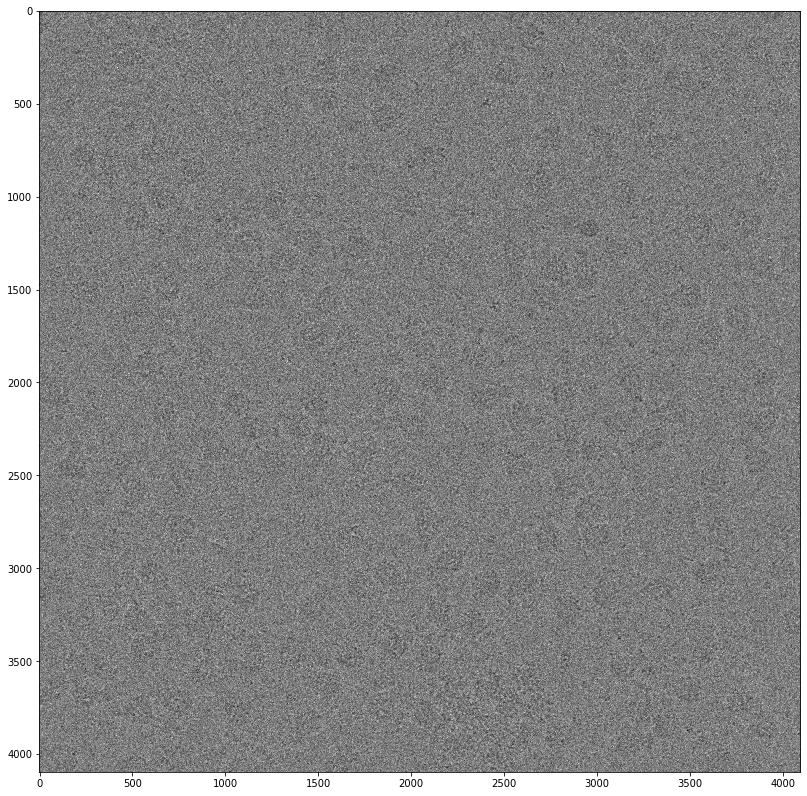

In [42]:
with mrcfile.mmap("/home/twagner/Projects/denoise/data/TOXIN_AVERAGES/TcdA1-0170_frames.mrc", permissive=True) as mrc:
    img = mrc.data
    img = img.squeeze()
plt.figure(figsize=(14,14))
plt.imshow(img,cmap="gray")
plt.show()

To run denoising, we use the prediction module. All the denoised averages will be save in output_path:

In [39]:
predict.predict_dir(
    input_path = test_averages,
    output_path = "/home/twagner/Projects/denoise/results/example/denoised_avg/",
    model=trained_model,
    patch_size=patch_size,
    padding=15,
    batch_size=batch_size
)

Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0170_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0171_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0172_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0173_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0174_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0175_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0176_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0177_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0178_frames.mrc
Write denoised image /home/twagner/Projects/denoise/results/example/denoi

Lets visualize one the results:

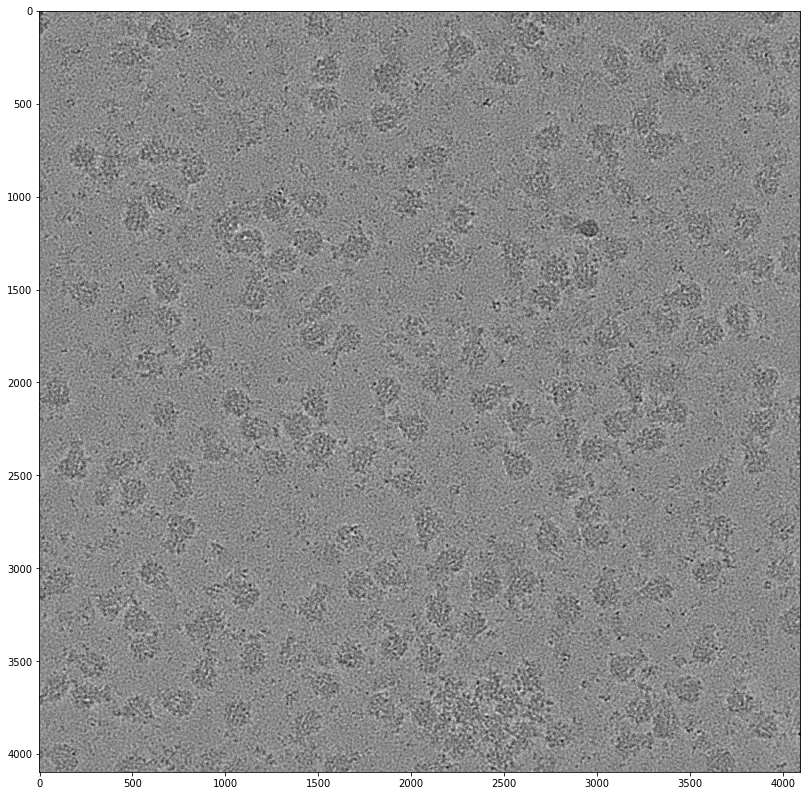

In [43]:
with mrcfile.mmap("/home/twagner/Projects/denoise/results/example/denoised_avg/TcdA1-0170_frames.mrc", permissive=True) as mrc:
    img = mrc.data
    img = img.squeeze()
plt.figure(figsize=(14,14))
plt.imshow(img,cmap="gray")
plt.show()

## 2.2 Denoise a single image (numpy array)

You might directly denoise a numpy image loaded in your memory:

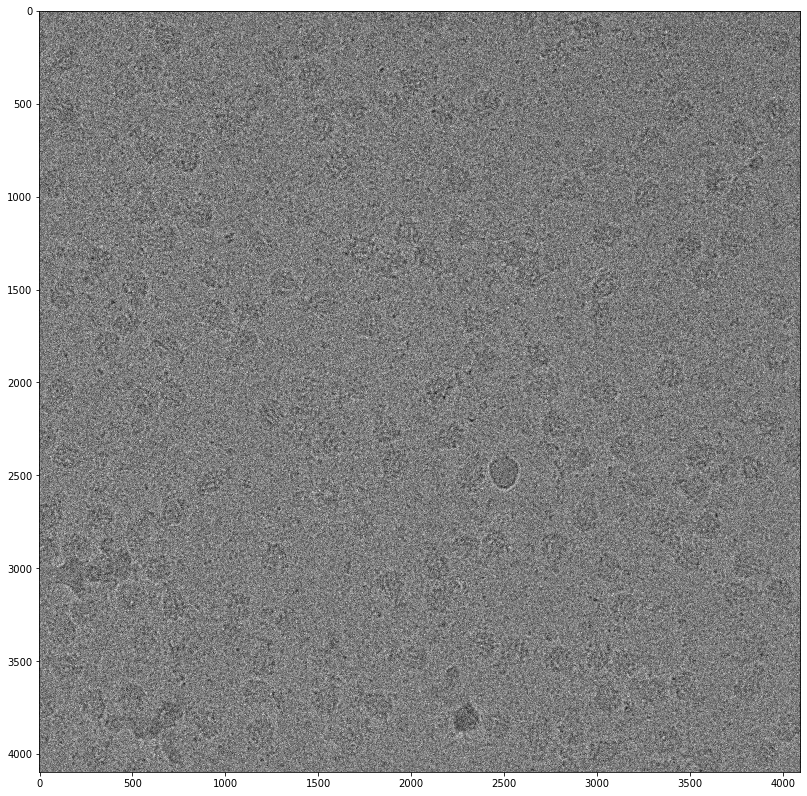

In [48]:
with mrcfile.mmap("/home/twagner/Projects/denoise/data/TOXIN_AVERAGES/TcdA1-0172_frames.mrc", permissive=True) as mrc:
    img = mrc.data
    img = img.squeeze()
plt.figure(figsize=(14,14))
plt.imshow(img,cmap="gray")
plt.show()

To denoise it, you have to call predict_np:

In [46]:
img_denoised = predict.predict_np(
    model=trained_model,
    image=img,
    patch_size=patch_size,
    padding=15,
    batch_size=batch_size
)

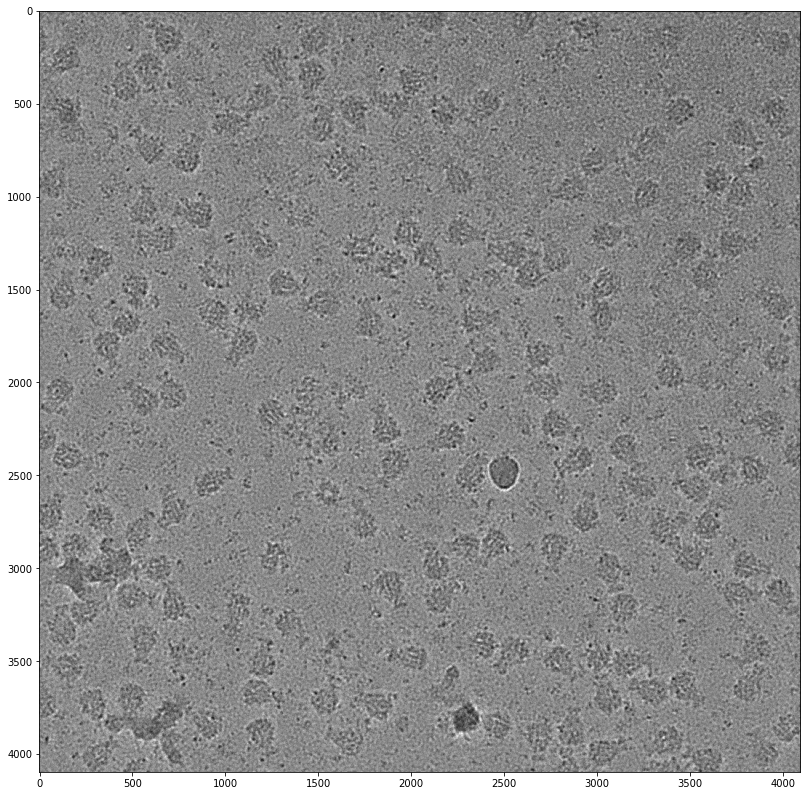

In [47]:
plt.figure(figsize=(14,14))
plt.imshow(img_denoised,cmap="gray")
plt.show()